Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


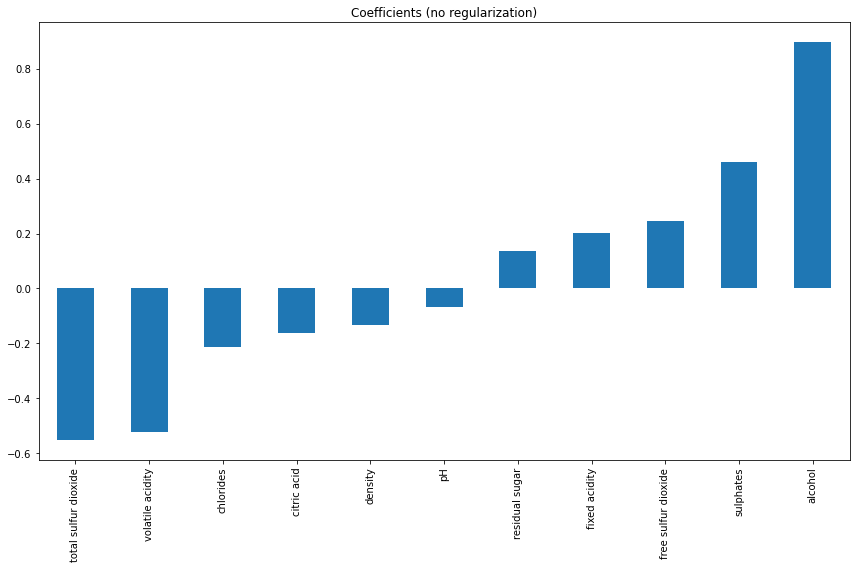

Model score no regularization
Training Score:  0.7727598566308242
Testing Score:  0.7266666666666667
Model score L2 regularization
Training Score:  0.7727598566308242
Testing Score:  0.7266666666666667


<Figure size 432x288 with 0 Axes>

In [1]:
#OBJECTIVE: Build a model to classify if a wine is 'good' (quality>5)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wine_quality.csv')
print(df.columns)
y = df['quality']
features = df.drop(columns = ['quality'])

#Data transformation
from sklearn.preprocessing import StandardScaler

standard_scaler_fit = StandardScaler().fit(features)
X = standard_scaler_fit.transform(features)

#Train-test split
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size= 0.20, random_state= 99)

#Fit a logistic regression classifier without regularization
from sklearn.linear_model import LogisticRegression
clf_no_reg = LogisticRegression(penalty = 'none')
clf_no_reg.fit(features_train, labels_train)

#Plot the coefficients
predictors = features.columns
coefficients = clf_no_reg.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
plt.figure(figsize = (12,8))
coef.plot(kind='bar', title = 'Coefficients (no regularization)')
plt.tight_layout()
plt.show()
plt.clf()

#Training and test performance
from sklearn.metrics import f1_score
label_pred_test = clf_no_reg.predict(features_test)
label_pred_train = clf_no_reg.predict(features_train)

print('Model score no regularization')
print('Training Score: ', f1_score(labels_train, label_pred_train))
print('Testing Score: ',f1_score(labels_test, label_pred_test))

#Default Implementation (L2-regularized!)
clf_default = LogisticRegression()
clf_default.fit(features_train, labels_train)
label_l2_train = clf_default.predict(features_train)
label_l2_test = clf_default.predict(features_test)

#Ridge Scores
print('Model score L2 regularization')
print('Training Score: ', f1_score(labels_train, label_l2_train))
print('Testing Score: ',f1_score(labels_test, label_l2_test))



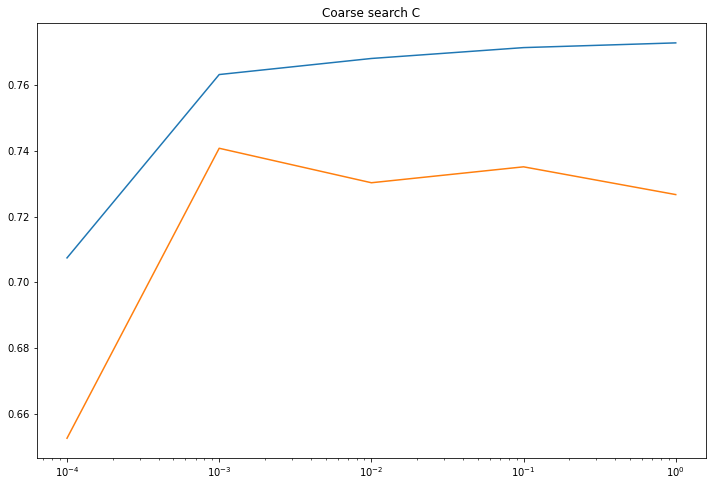

{'C': 0.0019630406500402726} 0.7723336222647887
Ridge Best C Test Score:  0.7407407407407408
Best C coefficients: [[ 0.05972032 -0.17958855  0.06967707  0.02632585 -0.08229576 -0.00363694
  -0.15188089 -0.09583473  0.0053758   0.14317828  0.2905976 ]]


<Figure size 432x288 with 0 Axes>

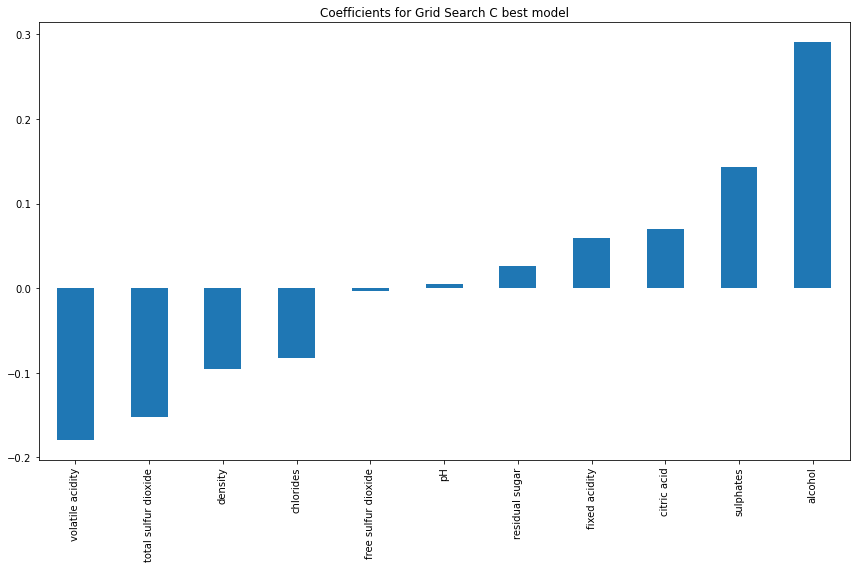

<Figure size 432x288 with 0 Axes>

In [2]:
#Coarse-grained hyperparameter tuning
training_array = []
test_array = []
C_array = [0.0001, 0.001, 0.01, 0.1, 1]

for c in C_array:
  clf = LogisticRegression(C= c)
  clf.fit(features_train, labels_train)
  label_pred_train = clf.predict(features_train)
  label_pred_test = clf.predict(features_test)
  training_array.append(f1_score(labels_train, label_pred_train))
  test_array.append(f1_score(labels_test, label_pred_test))

#Plot training and test scores as a function of C
plt.figure(figsize = (12,8))
plt.plot(C_array,training_array)
plt.plot(C_array,test_array)
plt.xscale('log')
plt.title('Coarse search C')
plt.show()
plt.clf()

#Making a parameter grid for GridSearchCV
c_array = np.logspace(-4,-2,100)
tuning_C = {'C':c_array}
#print(tuning_C)

#Implementing GridSearchCV with l2 penalty
from sklearn.model_selection import GridSearchCV
clf_gs = LogisticRegression()
model = GridSearchCV(estimator= clf_gs, param_grid= tuning_C, scoring= 'f1', cv= 5, return_train_score= True)
model.fit(features_train, labels_train)

#Optimal C value and the score corresponding to it
print(model.best_params_, model.best_score_)

#Validating the "best classifier"
clf_best_ridge= LogisticRegression(C= model.best_params_['C'])
clf_best_ridge.fit(features_train, labels_train)
best_label_train = clf_best_ridge.predict(features_train)
best_label_test = clf_best_ridge.predict(features_test)
print('Ridge Best C Test Score: ', f1_score(labels_test, best_label_test))
print('Best C coefficients: {}'.format(clf_best_ridge.coef_))

#Plotting the Best C coefficients
coefficients = clf_best_ridge.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
 
plt.figure(figsize = (12,8))
coef.plot(kind='bar', title = 'Coefficients for Grid Search C best model')
plt.tight_layout()
plt.show()
plt.clf()


Best LogitCV C: [0.25950242], Best LogitCV coefficients: [[ 0.11649667 -0.55635802 -0.17271997  0.03124642 -0.17324497  0.20053941
  -0.50581971  0.         -0.07044818  0.43224244  0.94104278]]


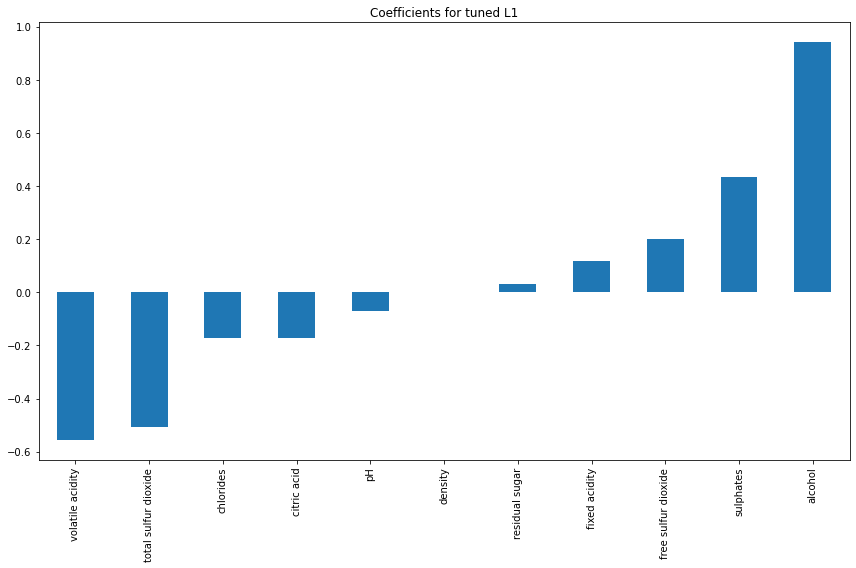

<Figure size 432x288 with 0 Axes>

In [3]:
#Implement L1 hyperparameter tuning with LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV
clf_l1 = LogisticRegressionCV(Cs= np.logspace(-2,2,100), cv= 5, penalty= 'l1', solver= 'liblinear', scoring= 'f1')
clf_l1.fit(X, y)

#Optimal C value and corresponding coefficients
print('Best LogitCV C: {}, Best LogitCV coefficients: {}'.format(clf_l1.C_, clf_l1.coef_))

#Plotting the tuned L1 coefficients
coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
 
plt.figure(figsize = (12,8))
coef.plot(kind='bar', title = 'Coefficients for tuned L1')
plt.tight_layout()
plt.show()
plt.clf()